## RFM Analysis - KMeans Clusters

**Clustering** merupakan salah satu metode **`Unsupervised Learning`** yang bertujuan untuk melakukan pengelompokan data berdasasrkan kemiripan/jarak antar data. Clustering memiliki karakteristik dimana anggota dalam satu cluster memiliki kemiripan yang sama atau jarak yang sangat dekat, sementara anggota antar cluster memiliki kemiripan yang sangat berbeda atau jarak yang sangat jauh.


### Analisa RFM 
* Analisa RFM bertujuan untuk mengetahui prilaku pelangan atau customers, seberapa besar kontribusi pelanggan terhadap produk yang di beli 
untuk menghasilkan profit ke perusahaan
* Ada 3 faktor dalam analisa RFM yaitu:

### RFM 

* R (Recency) = jumlah tanggal terakhir melakukan transaksi
* F (Frequency) = jumlah seberapa sering melakukan transaksi
* M (Monetary) = Jumlah total transaksi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\OnlineRetail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<b> Data cliening

In [8]:
# pengecekan missing values
df_null = round(100 * (df.isna().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [9]:
# menghapus missing values
df = df.dropna()
df.shape

(406829, 8)

In [10]:
# mengganti type data CustomerID dari float64 menjadi string
df['CustomerID'] = df['CustomerID'].astype(str)

<b> Setelah menghapus missing values dan mengganti typer data CustomerID kemudian melakukan langkah analisa RFM

<b> Data Preparation

## R (Recency)
* Jumlah tanggal terakhir melakukan transaksi

In [11]:
# merubah type data InvoiceDate dari object menjadi datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
# menghitung tanggal terakhir transaksi

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [13]:
# menghitung selisih tanggal transaksi dari tanggal pertama transaksi dengan tanggal terakhir transaksi dan 
# di tampung kedalam variabel 'Diff'

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00


In [14]:
# membuat dataframe baru yang menampung variabel CustomerID dan Diff

rfm_r = df.groupby('CustomerID')['Diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [15]:
# mengambil jumlah harinya saja dan menghapus kolom Diff dan memambahkan variabel Recency

rfm_r['Recency'] = rfm_r['Diff'].dt.days
rfm_r = rfm_r.drop('Diff', axis=1)
rfm_r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


<b> Sekarang membuat variabel baru untuk varibel Monetary

## F (Frequency)
* Jumlah seberapa sering melakukan transaksi

In [16]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


<b> Menggabungkan dataframe rfm_r dan rfm_f

In [17]:
rfm = pd.merge(rfm_r, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Recency,Frequency
0,12346.0,325,2
1,12347.0,1,182
2,12348.0,74,31
3,12349.0,18,73
4,12350.0,309,17


## M (Monetary)
* Jumlah total transaksi

In [18]:
df['Monetary'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34


In [19]:
# membuat dataframe baru untuk menjumlahkan total transaksi per CustomerID

rfm_m = df.groupby('CustomerID')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [20]:
# Menggabungkan kembali dataframe rfm dengan rfm_m 

rfm = pd.merge(rfm, rfm_m, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


<b> Semua vaktor variabel analisa RFM sudah terpenuhi,selanjutnya menganalisa data yang memiliki outlier meggunakan boxplot


In [21]:
plt.style.use(['science','notebook','grid'])

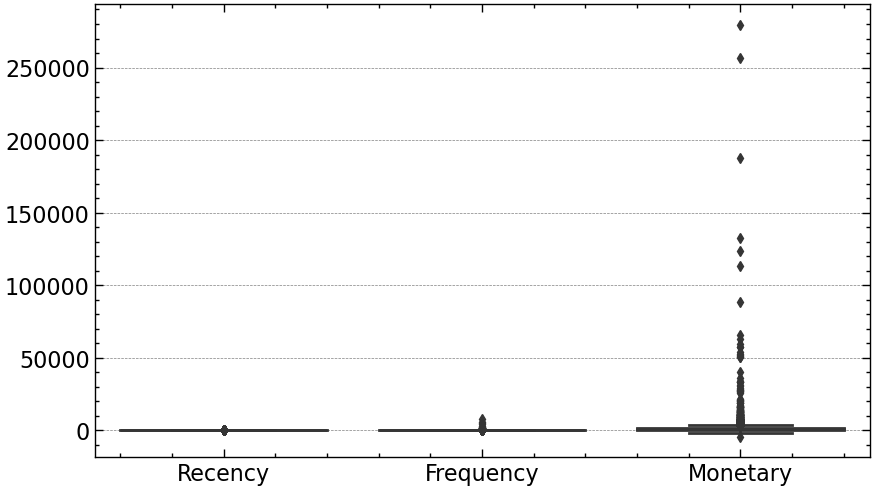

In [22]:
# membuat atribut baru untuk menampung data yang akan di cek outliernya
atributes = ['Recency','Frequency','Monetary']
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data= rfm[atributes]);

<b> Terdapat data yang mengandung outlier yang di tandai titik untuk itu data outlier akan di hapus

In [23]:
# Outlier Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5 * IQR) & (rfm.Recency <= Q3 + 1.5 * IQR)]

# Outlier Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5 * IQR) & (rfm.Frequency <= Q3 + 1.5 * IQR)]

# Outlier Monetary
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary > Q1 - 1.5 * IQR) & (rfm.Monetary <= Q3 + 1.5 * IQR)]

rfm.shape

(4290, 4)

<b> Setelah data outlier telah bersih kemudian akan `Rescaling` menggunakan StandardScaler

In [24]:
# membuat dataframe baru yang akan di scaling
scaling_rfm = rfm[['Recency','Frequency','Monetary']]
scaling_rfm.head()

,Recency,Frequency,Monetary
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
rfm_scaler = scaler.fit_transform(scaling_rfm )

In [28]:
rfm_scaler

array([[ 2.3007653 , -0.74987222, -0.73883491],
       [-0.90690322,  1.0412316 ,  1.79662655],
       [-0.18418778, -0.46130549,  0.31843487],
       ...,
       [-0.84750195, -0.64041587, -0.6349457 ],
       [-0.8871028 ,  6.75286265,  0.49352878],
       [-0.50099455, -0.073233  ,  0.34198937]])

<b> Data yang sudah di scaling akan di kembalikan menjadi dataframe kembali

In [29]:
rfm_df = pd.DataFrame(rfm_scaler, columns = scaling_rfm.columns)
rfm_df.head()

,Recency,Frequency,Monetary
0,2.300765,-0.749872,-0.738835
1,-0.906903,1.041232,1.796627
2,-0.184188,-0.461305,0.318435
3,-0.738600,-0.043381,0.295086
4,2.142362,-0.600614,-0.542116


## Model KMeans Cluster

In [30]:
from sklearn.cluster import KMeans

In [31]:
model = KMeans(n_clusters = 3, max_iter= 50)

In [32]:
cluster_model = model.fit(rfm_df)

In [33]:
cluster_model.labels_

array([2, 1, 0, ..., 0, 1, 0])

<b> Untuk mendapatkan jumlah cluster yang tepat maka di perlukan method Elbow, ssd(sum square distance)

In [34]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, max_iter=50)
    kmeans.fit_predict(rfm_df)
    
    ssd.append(kmeans.inertia_)

In [35]:
plt.style.use(['science','notebook','grid'])

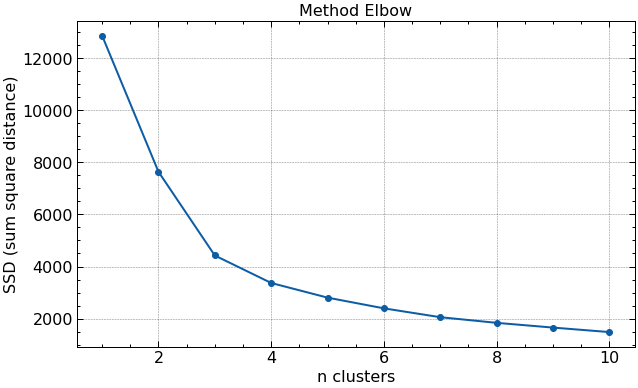

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),ssd, 'o-');
plt.title('Method Elbow')
plt.xlabel('n clusters')
plt.ylabel('SSD (sum square distance)')
plt.show()

* Dari hasil ploting method Elbow jumlah cluster (k) yang tepat adalah cluster k(5) untuk itu dicoba memploting titik cluster

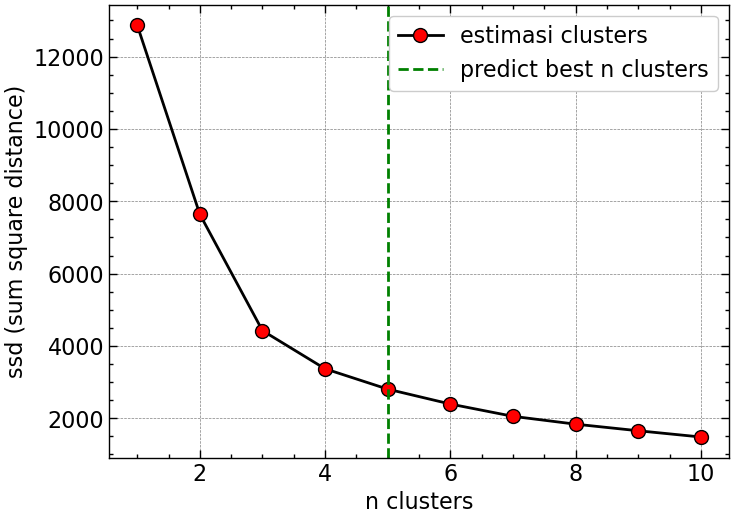

In [37]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(range(1, 11), ssd,'o-', markerfacecolor='red', lw=2, color='black', markersize=10, label='estimasi clusters')
plt.xlabel('n clusters')
plt.ylabel('ssd (sum square distance)')


# titik cluster 
num_cluster = 5

plt.axvline(x=num_cluster, color='green', ls='--', lw=2, label='predict best n clusters')
plt.legend()
plt.show()

* Pada kenyataanya perhitungan menggunakan method elbow menghasilkan nilai yang ambigu, suka berubah ubah dan tidak tepat dalam 
menetukan jumlah clusters, untuk meyakinan kembali maka digunakan **`Silhouette Score **`** untuk mencari nilai teringgi

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
for num_cluster in range(2,10):
    kmeans = KMeans(n_clusters = num_cluster, max_iter =50)
    kmeans = kmeans.fit(rfm_df)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df, cluster_labels)
    print(f'Angka cluster = {num_cluster} dengan nilai silhouette score = {silhouette_avg}')

Angka cluster = 2 dengan nilai silhouette score = 0.537506551504052
Angka cluster = 3 dengan nilai silhouette score = 0.5070934441124859
Angka cluster = 4 dengan nilai silhouette score = 0.47715297341949986
Angka cluster = 5 dengan nilai silhouette score = 0.46916795572056086
Angka cluster = 6 dengan nilai silhouette score = 0.41774751496986345
Angka cluster = 7 dengan nilai silhouette score = 0.41094898949540376
Angka cluster = 8 dengan nilai silhouette score = 0.40722585534829997
Angka cluster = 9 dengan nilai silhouette score = 0.40956333962461966


* Dari hasil perhitungan **` Silhouette Score`** didapatkan angka clusters terbaik berada di clusters (k=2) dengan nilai silhouette score tertinggi 0.537506551504052 

In [40]:
from yellowbrick.cluster import silhouette_visualizer

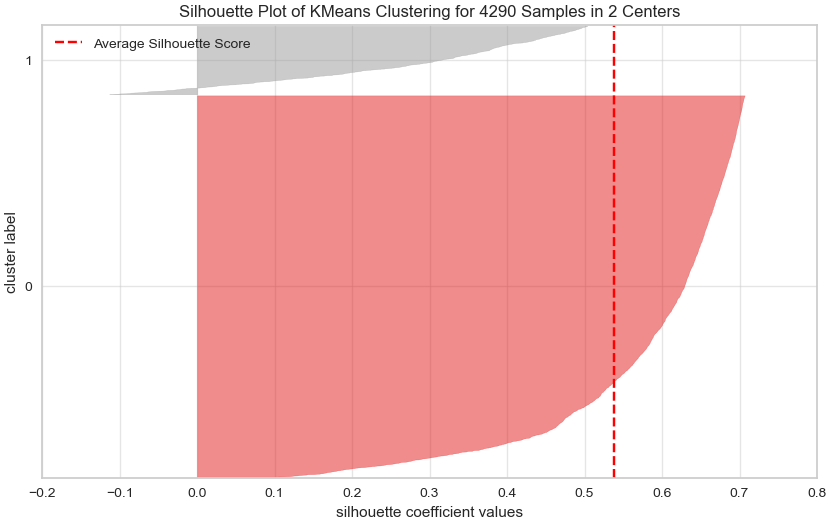

In [41]:
plt.figure(figsize=(10,6), dpi=100)
silhouette_visualizer(KMeans(n_clusters=2, max_iter=50), rfm_df,cluster_labels );

## Final Model KMeans Clusters

In [42]:
model = KMeans(n_clusters=2, max_iter = 50)

In [43]:
model = model.fit(rfm_df)

In [44]:
model.labels_

array([0, 1, 0, ..., 0, 1, 0])

In [45]:
rfm_df['Cluster_id'] = model.labels_

In [46]:
rfm_df.head()

,Recency,Frequency,Monetary,Cluster_id
0,2.300765,-0.749872,-0.738835,0
1,-0.906903,1.041232,1.796627,1
2,-0.184188,-0.461305,0.318435,0
3,-0.738600,-0.043381,0.295086,0
4,2.142362,-0.600614,-0.542116,0


<AxesSubplot:xlabel='Cluster_id', ylabel='Recency'>

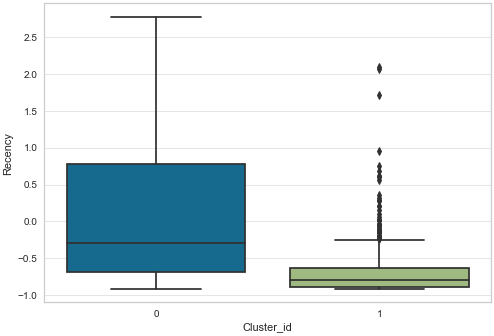

In [47]:
# visaulisasi Recency dengan Cluster_id

sns.boxplot(x='Cluster_id', y='Recency', data=rfm_df)

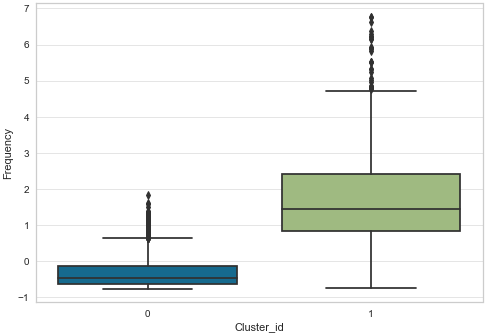

In [48]:
# visualisasi Frequency dengan Cluster_id

sns.boxplot(x='Cluster_id', y='Frequency', data=rfm_df);

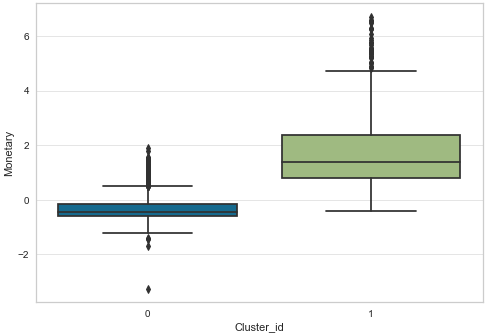

In [49]:
# visualisasi Monetary dengan Cluster_id

sns.boxplot(x='Cluster_id', y='Monetary', data=rfm_df);

## kesimpulan
* Clusters dengan id 1 merupakan clusters yang paling sering melakukan transaksi dibanding dengan clusters lainnya
* Clusters dengan id 1 merupakan clusters yang nilai total transaksi paling banyak dibanding dengan clusters lainnya

### Catatan
* kesimpulan ini di ambil disaat cluster id 1 mempunyai nilai yang positif
* gambar boxplot di sesuian dengan **model.labels_** untuk itu jika di **run** berulang kali terkadang nilai **model.labels_** akan berubah
* jika ingin mengambil keputusan harap berhati-hati dalam menetapkannya, mohon untuk di sesuikan dengan **model.labels_**
yang mempengaruhi boxplot

---